### Libraries

In [554]:
import pandas as pd
import numpy as np
import sklearn
import skmultilearn

from IPython.display import Image
from prettytable import PrettyTable

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import zero_one_loss
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN
from skmultilearn.adapt import BRkNNaClassifier

### Import data

In [555]:
student=pd.read_csv('C:\\Users\\Dusica\\Downloads\\Student Performance\\student-mat.csv',sep=';')

### Descriptive statistics

In [556]:
student.shape

(395, 33)

In [557]:
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4.0,NaN,at_home,teacher,...,4.0,3.0,4,1,1.0,3,6.0,5,6,6
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,...,5.0,3.0,3,1,1.0,3,4.0,5,5,6
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,4.0,3.0,2,2,3.0,3,10.0,7,8,10
3,GP,F,15,U,GT3,T,4.0,2.0,health,services,...,3.0,2.0,2,1,1.0,5,2.0,15,14,15
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,4.0,3.0,2,1,2.0,5,4.0,6,10,10


In [558]:
student.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,394.000000,393.000000,394.000000,395.000000,394.000000,394.000000,394.000000,395.000000,395.000000,394.000000,395.000000,394.000000,395.000000,395.000000,395.000000
mean,16.696203,2.746193,2.516539,1.444162,2.035443,0.335025,3.941624,3.238579,3.108861,1.481013,2.291878,3.554430,5.713198,10.908861,10.713924,10.415190
std,1.276043,1.094306,1.088135,0.693979,0.839240,0.744405,0.896214,0.998184,1.113278,0.890741,1.289450,1.390303,8.012806,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [559]:
student.select_dtypes(include=['object']).describe()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,394,394,395,394,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,216,144,273,344,242,214,201,314,375,329,263


In [560]:
pd.concat([student.dtypes,student.isnull().sum()],axis=1)

,0,1
school,object,0
sex,object,0
age,int64,0
address,object,0
famsize,object,0
Pstatus,object,0
Medu,float64,1
Fedu,float64,2
Mjob,object,0
Fjob,object,1


In [561]:
a=[]
for i in range(len(student.isnull().sum())):
        if student.isnull().sum()[i]>0:
            a.append(student.isnull().sum()[i])
            print (student.columns[i],student.isnull().sum()[i])
print('Conclusion: There are ',len(a),' NULL values')

Medu 1
Fedu 2
Fjob 1
reason 1
traveltime 1
failures 1
schoolsup 1
famrel 1
freetime 1
Walc 1
absences 1
Conclusion: There are  11  NULL values


### Cleaning data

##### Categorical variables

In [562]:
#Fjob, reason, schoolsup
student["Fjob"].value_counts() 
student=student.fillna({"Fjob": "other"})

In [563]:
student["reason"].value_counts() 
student=student.fillna({"reason": "course"})

In [564]:
student["schoolsup"].value_counts() 
student=student.fillna({"schoolsup": "no"})

##### Numerical variables

In [565]:
student.traveltime.fillna(np.average(student.traveltime.dropna()), inplace=True)
student.Medu.fillna(np.average(student.Medu.dropna()), inplace=True)
student.failures.fillna(np.average(student.failures.dropna()), inplace=True)
student.Fedu.fillna(np.average(student.Fedu.dropna()), inplace=True)
student.famrel.fillna(np.average(student.famrel.dropna()), inplace=True)
student.freetime.fillna(np.average(student.freetime.dropna()), inplace=True)
student.Walc.fillna(np.average(student.Walc.dropna()), inplace=True)
student.absences.fillna(np.average(student.absences.dropna()), inplace=True)

In [566]:
a=[]
for i in range(len(student.isnull().sum())):
        if student.isnull().sum()[i]>0:
            a.append(student.isnull().sum()[i])
            print (student.columns[i],student.isnull().sum()[i])
print('Conclusion: There are ',len(a),' NULL values')

Conclusion: There are  0  NULL values


#### Dummy variables

In [567]:
dummies=pd.get_dummies(student[['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']])

In [568]:
student_dummies=student.drop(student[['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']], axis=1)

In [569]:
student_dummies=student_dummies.join(dummies)

In [570]:
#Grade>=10 passed(1); Grade<10 failed(0)
for i in range(student_dummies.columns.get_loc("G1"),student_dummies.columns.get_loc("G3")+1):
    student_dummies.iloc[:,i] = np.where(student_dummies.iloc[:,i]<10, 0, 1)

# Multi class classification
# 1. Problem transformation methods

##     a)The binary relevance method (BR)
the simplest problem transformation method
BR learns a binary classifier for each label

--- labels are predicted independently of each other and label dependencies are not taken into account.

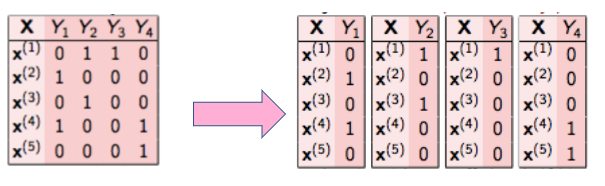

In [571]:
Image(filename="C:\\Users\\Dusica\\Desktop\\RESURSII ZA MLC\\BinaryRelevance2.png",width=500, height=300)

### TARGET LABELS [G1, G2, G3]

In [572]:
x=student_dummies.drop(['G1','G2','G3'],axis=1)

In [573]:
y=student_dummies[['G1','G2','G3']]

In [574]:
a_train, a_test, b_train, b_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [575]:
#classifier = BinaryRelevance(RandomForestClassifier())
#classifier = BinaryRelevance(GaussianNB())
classifier = BinaryRelevance(LogisticRegression())

# train
classifier.fit(a_train, b_train)

# predict
predictions = classifier.predict(a_test)

In [576]:
predictions.todense()[0:5]

matrix([[0, 0, 0],
        [1, 0, 0],
        [1, 1, 0],
        [1, 1, 1],
        [1, 0, 0]], dtype=int32)

In [577]:
t = PrettyTable(['Measures', 'Value'])
t.add_row(['Accuracy',accuracy_score(b_test,predictions)])
t.add_row(['Precision',precision_score(b_test,predictions,average='macro')])
t.add_row(['Recall',recall_score(b_test,predictions,average='macro')])
t.add_row(['0/1 loss',zero_one_loss(b_test,predictions)])
t.add_row(['F1',f1_score(b_test,predictions,average='macro')])
print(t)

+-----------+----------------+
|  Measures |     Value      |
+-----------+----------------+
|  Accuracy | 0.521008403361 |
| Precision | 0.673772956807 |
|   Recall  | 0.913084019504 |
|  0/1 loss | 0.478991596639 |
|     F1    | 0.775129172036 |
+-----------+----------------+


### *TARGET LABELS  [G2, G3]

In [578]:
x2=student_dummies.drop(['G2','G3'],axis=1)

In [579]:
y2=student_dummies[['G2','G3']]

In [580]:
a2_train, a2_test, b2_train, b2_test = train_test_split(x2,y2, test_size=0.3, random_state=42)

In [581]:
#classifier = BinaryRelevance(RandomForestClassifier())
#classifier = BinaryRelevance(GaussianNB())
classifier = BinaryRelevance(LogisticRegression())

# train
classifier.fit(a2_train, b2_train)

# predict
predictions2 = classifier.predict(a2_test)

In [582]:
t2 = PrettyTable(['Measures', 'Value'])
t2.add_row(['Accuracy',accuracy_score(b2_test,predictions2)])
t2.add_row(['Precision',precision_score(b2_test,predictions2,average='macro')])
t2.add_row(['Recall',recall_score(b2_test,predictions2,average='macro')])
t2.add_row(['0/1 loss',zero_one_loss(b2_test,predictions2)])
t2.add_row(['F1',f1_score(b2_test,predictions2,average='macro')])
print(t2)

+-----------+----------------+
|  Measures |     Value      |
+-----------+----------------+
|  Accuracy | 0.764705882353 |
| Precision | 0.828114700066 |
|   Recall  | 0.929327521793 |
|  0/1 loss | 0.235294117647 |
|     F1    | 0.875806451613 |
+-----------+----------------+


In [583]:
print(t)
print(t2)

+-----------+----------------+
|  Measures |     Value      |
+-----------+----------------+
|  Accuracy | 0.521008403361 |
| Precision | 0.673772956807 |
|   Recall  | 0.913084019504 |
|  0/1 loss | 0.478991596639 |
|     F1    | 0.775129172036 |
+-----------+----------------+
+-----------+----------------+
|  Measures |     Value      |
+-----------+----------------+
|  Accuracy | 0.764705882353 |
| Precision | 0.828114700066 |
|   Recall  | 0.929327521793 |
|  0/1 loss | 0.235294117647 |
|     F1    | 0.875806451613 |
+-----------+----------------+


## b) Classifier Chains
 -The first classifier is trained just on the input data and then each next classifier is trained on the input space and all the previous classifiers in the chain.

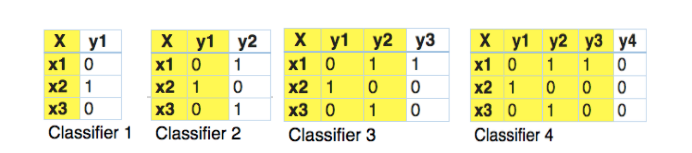

In [584]:
Image(filename="C:\\Users\\Dusica\\Desktop\\RESURSII ZA MLC\\ClassifierChains.png",width=700, height=700)

### TARGET LABELS [G1, G2, G3]

In [585]:
classifier = ClassifierChain(LogisticRegression())

# train
classifier.fit(a_train, b_train)

# predict
predictions = classifier.predict(a_test)
 
 
t = PrettyTable(['Measures', 'Value'])
t.add_row(['Accuracy',accuracy_score(b_test,predictions)])
t.add_row(['Precision',precision_score(b_test,predictions,average='macro')])
t.add_row(['Recall',recall_score(b_test,predictions,average='macro')])
t.add_row(['0/1 loss',zero_one_loss(b_test,predictions)])
t.add_row(['F1',f1_score(b_test,predictions,average='macro')])
print(t) 

+-----------+----------------+
|  Measures |     Value      |
+-----------+----------------+
|  Accuracy | 0.571428571429 |
| Precision | 0.65817770232  |
|   Recall  | 0.898416799357 |
|  0/1 loss | 0.428571428571 |
|     F1    | 0.759535040431 |
+-----------+----------------+


In [586]:
#Nested stacking
#proba

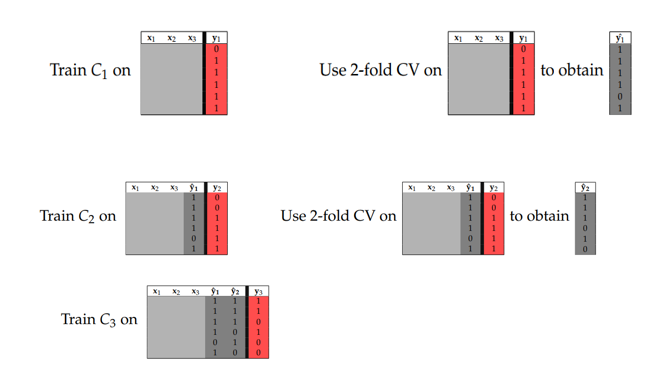

In [587]:
Image(filename="C:\\Users\\Dusica\\Desktop\\RESURSII ZA MLC\\NestedStacking.png",width=700, height=700)

In [589]:
x1_ns=x
y1_ns=y['G1']

In [590]:
predicted_G1 = cross_val_predict(LogisticRegression(), x1_ns, y1_ns, cv=2)
accuracy_score(y1_ns, predicted_G1) 

0.65822784810126578

In [591]:
x1_ns['predicted_G1']=predicted_G1
y2_ns=y['G2']

In [592]:
predicted_G2 = cross_val_predict(LogisticRegression(), x1_ns, y2_ns, cv=2)
accuracy_score(y2_ns, predicted_G2) 

0.67594936708860764

In [593]:
x1_ns['predicted_G2']=predicted_G2
y3_ns=y['G3']

In [594]:
predicted_G3 = cross_val_predict(LogisticRegression(), x1_ns, y3_ns, cv=2)
accuracy_score(y3_ns, predicted_G3) 

0.66075949367088604

In [595]:
#Dependent binary relevance - DBR
#proba

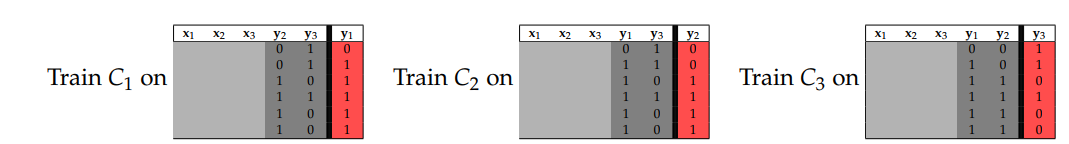

In [596]:
Image(filename="C:\\Users\\Dusica\\Desktop\\RESURSII ZA MLC\\dbr.png",width=700, height=700)

In [598]:
x1_dbr=student_dummies.drop('G1',axis=1)
y1_dbr=y['G1']

In [599]:
predicted_G1 = cross_val_predict(LogisticRegression(), x1_dbr, y1_dbr, cv=5)
accuracy_score(y1_dbr, predicted_G1) 

0.84303797468354436

In [600]:
x2_dbr=student_dummies.drop('G2',axis=1)
y2_dbr=y['G2']

In [601]:
predicted_G2 = cross_val_predict(LogisticRegression(), x2_dbr, y2_dbr, cv=5)
accuracy_score(y2_dbr, predicted_G2) 

0.91392405063291138

In [602]:
x3_dbr=student_dummies.drop('G3',axis=1)
y3_dbr=y['G3']

In [603]:
predicted_G3 = cross_val_predict(LogisticRegression(), x3_dbr, y3_dbr, cv=5)
accuracy_score(y3_dbr, predicted_G3) 

0.89367088607594936

### *TARGET LABELS [G2, G3]

In [604]:
classifier = ClassifierChain(LogisticRegression())

# train
classifier.fit(a2_train, b2_train)

# predict
predictions2 = classifier.predict(a2_test)
 
 
t = PrettyTable(['Measures', 'Value'])
t.add_row(['Accuracy',accuracy_score(b2_test,predictions2)])
t.add_row(['Precision',precision_score(b2_test,predictions2,average='macro')])
t.add_row(['Recall',recall_score(b2_test,predictions2,average='macro')])
t.add_row(['0/1 loss',zero_one_loss(b2_test,predictions2)])
t.add_row(['F1',f1_score(b2_test,predictions2,average='macro')])
print(t)

+-----------+----------------+
|  Measures |     Value      |
+-----------+----------------+
|  Accuracy | 0.806722689076 |
| Precision | 0.839255922589 |
|   Recall  | 0.936176836862 |
|  0/1 loss | 0.193277310924 |
|     F1    | 0.885064935065 |
+-----------+----------------+


## c) Label Powerset
It transforms the problem into a multi-class problem with one multi-class classifier which is trained on all unique label combinations found in the training data.
x1 and x4 have the same labels, similarly, x3 and x6 have the same set of labels. Label powerset transforms this problem into a single multi-class problem as shown below.
Disadvantage:  The only disadvantage of this is that as the training data increases, number of classes also inreases, and measure values decrease.  

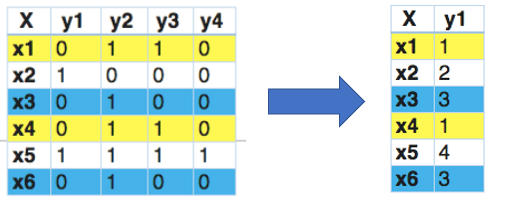

In [605]:
Image(filename="C:\\Users\\Dusica\\Desktop\\RESURSII ZA MLC\\LabelPowerset2.png",width=500, height=300)

### TARGET LABELS [G1, G2, G3]

In [606]:
classifier = LabelPowerset(LogisticRegression())

# train
classifier.fit(a_train, b_train)

# predict
predictions = classifier.predict(a_test)

t = PrettyTable(['Measures', 'Value'])
t.add_row(['Accuracy',accuracy_score(b_test,predictions)])
t.add_row(['Precision',precision_score(b_test,predictions,average='macro')])
t.add_row(['Recall',recall_score(b_test,predictions,average='macro')])
t.add_row(['0/1 loss',zero_one_loss(b_test,predictions)])
t.add_row(['F1',f1_score(b_test,predictions,average='macro')])
print(t) 

+-----------+----------------+
|  Measures |     Value      |
+-----------+----------------+
|  Accuracy | 0.588235294118 |
| Precision | 0.664059138854 |
|   Recall  | 0.922625353928 |
|  0/1 loss | 0.411764705882 |
|     F1    | 0.772061868226 |
+-----------+----------------+


### *TARGET LABELS [G2, G3]

In [620]:
classifier = LabelPowerset(LogisticRegression())

# train
classifier.fit(a2_train, b2_train)

# predict
predictions = classifier.predict(a2_test)

 
t = PrettyTable(['Measures', 'Value'])
t.add_row(['Accuracy',accuracy_score(b2_test,predictions)])
t.add_row(['Precision',precision_score(b2_test,predictions,average='macro')])
t.add_row(['Recall',recall_score(b2_test,predictions,average='macro')])
t.add_row(['0/1 loss',zero_one_loss(b2_test,predictions)])
t.add_row(['F1',f1_score(b2_test,predictions,average='macro')])
print(t) 

+-----------+----------------+
|  Measures |     Value      |
+-----------+----------------+
|  Accuracy | 0.789915966387 |
| Precision | 0.819198873416 |
|   Recall  | 0.943752594438 |
|  0/1 loss | 0.210084033613 |
|     F1    | 0.87703962704  |
+-----------+----------------+


# 2. Algorithm adaptation methods

Adapted algorithm, as the name suggests, adapting the algorithm to directly perform multi-label classification, rather than transforming the problem into different subsets of problems.

multi-label version of kNN is represented by MLkNN

### TARGET LABELS [G1, G2, G3]

In [621]:
a_train_sp=scipy.sparse.csr_matrix(a_train.values)
b_train_sp=scipy.sparse.csr_matrix(b_train.values)
a_test_sp=scipy.sparse.csr_matrix(a_test.values)
b_test_sp=scipy.sparse.csr_matrix(b_test.values)

In [622]:
classifier = MLkNN(k=20)

# train
classifier.fit(a_train_sp, b_train_sp)

# predict
predictions = classifier.predict(a_test_sp)
#predict_proba

 
t = PrettyTable(['Measures', 'Value'])
t.add_row(['Accuracy',accuracy_score(b_test_sp,predictions)])
t.add_row(['Precision',precision_score(b_test_sp,predictions,average='macro')])
t.add_row(['Recall',recall_score(b_test_sp,predictions,average='macro')])
t.add_row(['0/1 loss',zero_one_loss(b_test_sp,predictions)])
t.add_row(['F1',f1_score(b_test_sp,predictions,average='macro')])
print(t) 

+-----------+----------------+
|  Measures |     Value      |
+-----------+----------------+
|  Accuracy | 0.487394957983 |
| Precision | 0.619729708547 |
|   Recall  | 0.953853604539 |
|  0/1 loss | 0.512605042017 |
|     F1    | 0.74959880321  |
+-----------+----------------+


In [623]:
classifier = BRkNNaClassifier(k=4)

# train
classifier.fit(a_train_sp, b_train_sp)

# predict
predictions = classifier.predict(a_test_sp)
#predict_proba


t = PrettyTable(['Measures', 'Value'])
t.add_row(['Accuracy',accuracy_score(b_test,predictions)])
t.add_row(['Precision',precision_score(b_test,predictions,average='macro')])
t.add_row(['Recall',recall_score(b_test,predictions,average='macro')])
t.add_row(['0/1 loss',zero_one_loss(b_test,predictions)])
t.add_row(['F1',f1_score(b_test,predictions,average='macro')])
print(t) 

+-----------+----------------+
|  Measures |     Value      |
+-----------+----------------+
|  Accuracy | 0.504201680672 |
| Precision | 0.597442313039 |
|   Recall  | 0.951324737871 |
|  0/1 loss | 0.495798319328 |
|     F1    | 0.733667116126 |
+-----------+----------------+


### *TARGET LABELS [G2, G3]

In [627]:
a2_train_sp=scipy.sparse.csr_matrix(a2_train.values)
b2_train_sp=scipy.sparse.csr_matrix(b2_train.values)
a2_test_sp=scipy.sparse.csr_matrix(a2_test.values)
b2_test_sp=scipy.sparse.csr_matrix(b2_test.values)

In [628]:
classifier = MLkNN(k=20)

# train
classifier.fit(a2_train_sp, b2_train_sp)

# predict
predictions = classifier.predict(a2_test_sp)
#predict_proba

accuracy_score(b2_test_sp,predictions)

0.60504201680672265

In [629]:
# Binary Relevance kNN classifier that assigns a label if at least half of the neighbors are also classified with the label
classifier = BRkNNaClassifier(k=2)

# train
classifier.fit(a2_train_sp, b2_train_sp)

# predict
predictions = classifier.predict(a2_test_sp)

accuracy_score(b2_test,predictions)

0.62184873949579833

# 3. Ensemble Approaches?
Ensemble always produces better results. Scikit-Multilearn library provides different ensembling classification functions, which you can use for obtaining better results.

# Yeast dataset practice

In [630]:
import scipy
from scipy.io import arff
data, meta = scipy.io.arff.loadarff('/Users/Dusica/Downloads/yeast/yeast-train.arff')
df = pd.DataFrame(data)

In [631]:
df.shape

(1500, 117)

In [632]:
df.head()

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0.093700,0.139771,0.062774,0.007698,0.083873,-0.119156,0.073305,0.005510,0.027523,0.043477,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
1,-0.022711,-0.050504,-0.035691,-0.065434,-0.084316,-0.378560,0.038212,0.085770,0.182613,-0.055544,...,b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'1',b'1',b'0'
2,-0.090407,0.021198,0.208712,0.102752,0.119315,0.041729,-0.021728,0.019603,-0.063853,-0.053756,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'1',b'0'
3,-0.085235,0.009540,-0.013228,0.094063,-0.013592,-0.030719,-0.116062,-0.131674,-0.165448,-0.123053,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'1',b'1'
4,-0.088765,-0.026743,0.002075,-0.043819,-0.005465,0.004306,-0.055865,-0.071484,-0.159025,-0.111348,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'


In [633]:
for i in range(df.columns.get_loc("Class1"),df.columns.get_loc("Class14")+1):
    df.iloc[:,i] =df.iloc[:,i] .replace(df.iloc[:,i] .unique()[1], 1)
    df.iloc[:,i]  =df.iloc[:,i] .replace(df.iloc[:,i] .unique()[0], 0)

In [634]:
for i in range(df.columns.get_loc("Class1"),df.columns.get_loc("Class14")+1):
      print(df.iloc[:,i].unique())

[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


In [635]:
df.head(1)

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0.0937,0.139771,0.062774,0.007698,0.083873,-0.119156,0.073305,0.00551,0.027523,0.043477,...,0,0,0,0,0,0,0,0,0,0


In [636]:
#df.loc[:,[df.iloc[:,0], df.iloc[:,1]]]
y_yeast=df.loc[:,"Class1":"Class14"]

In [642]:
x_yeast=df.drop(y_yeast,axis=1)

In [643]:
x_yeast_train, x_yeast_test, y_yeast_train, y_yeast_test = train_test_split(x_yeast,y_yeast, test_size=0.3, random_state=42)

### 1. Problem transformation 
 ####   Binary Relevance 

In [644]:
classifier = BinaryRelevance(LogisticRegression())

# train
classifier.fit(x_yeast_train, y_yeast_train)

# predict
predictions = classifier.predict(x_yeast_test)

In [645]:
x_yeast_test.shape

(450, 103)

In [646]:
predictions.todense()

matrix([[0, 0, 0, ..., 1, 1, 0],
        [0, 0, 1, ..., 1, 1, 0],
        [0, 1, 0, ..., 1, 1, 0],
        ..., 
        [0, 0, 0, ..., 1, 1, 0],
        [1, 0, 1, ..., 1, 1, 0],
        [1, 1, 1, ..., 1, 1, 0]], dtype=int64)

In [647]:
t = PrettyTable(['Measures', 'Value'])
t.add_row(['Accuracy',accuracy_score(y_yeast_test,predictions)])
t.add_row(['Precision',precision_score(y_yeast_test,predictions,average='micro')])
t.add_row(['Recall',recall_score(y_yeast_test,predictions,average='micro')])
t.add_row(['0/1 loss',zero_one_loss(y_yeast_test,predictions)])
t.add_row(['F1',f1_score(y_yeast_test,predictions,average='micro')])
print(t) 

+-----------+----------------+
|  Measures |     Value      |
+-----------+----------------+
|  Accuracy | 0.115555555556 |
| Precision | 0.744438415627 |
|   Recall  | 0.622504537205 |
|  0/1 loss | 0.884444444444 |
|     F1    | 0.678033110946 |
+-----------+----------------+


### 2. Algorithm adaptation

In [648]:
x_yeast_train_sp=scipy.sparse.csr_matrix(x_yeast_train.values)
y_yeast_train_sp=scipy.sparse.csr_matrix(y_yeast_train.values)
x_yeast_test_sp=scipy.sparse.csr_matrix(x_yeast_test.values)
y_yeast_test_sp=scipy.sparse.csr_matrix(y_yeast_test.values)

In [649]:
classifier = MLkNN(k=10)

# train
classifier.fit(x_yeast_train_sp, y_yeast_train_sp)

# predict
predictions = classifier.predict(x_yeast_test_sp)
#predict_proba


t = PrettyTable(['Measures', 'Value'])
t.add_row(['Accuracy',accuracy_score(y_yeast_test_sp,predictions)])
t.add_row(['Precision',precision_score(y_yeast_test_sp,predictions,average='micro')])
t.add_row(['Recall',recall_score(y_yeast_test_sp,predictions,average='micro')])
t.add_row(['0/1 loss',zero_one_loss(y_yeast_test_sp,predictions)])
t.add_row(['F1',f1_score(y_yeast_test_sp,predictions,average='micro')])
print(t) 

+-----------+----------------+
|  Measures |     Value      |
+-----------+----------------+
|  Accuracy | 0.175555555556 |
| Precision | 0.718461538462 |
|   Recall  | 0.635662431942 |
|  0/1 loss | 0.824444444444 |
|     F1    | 0.674530572942 |
+-----------+----------------+


In [650]:
classifier = BRkNNaClassifier(k=10)

# train
classifier.fit(x_yeast_train_sp, y_yeast_train_sp)

# predict
predictions = classifier.predict(x_yeast_test_sp)
#predict_proba

t = PrettyTable(['Measures', 'Value'])
t.add_row(['Accuracy',accuracy_score(y_yeast_test,predictions)])
t.add_row(['Precision',precision_score(y_yeast_test,predictions,average='micro')])
t.add_row(['Recall',recall_score(y_yeast_test,predictions,average='micro')])
t.add_row(['0/1 loss',zero_one_loss(y_yeast_test,predictions)])
t.add_row(['F1',f1_score(y_yeast_test,predictions,average='micro')])
print(t) 

+-----------+----------------+
|  Measures |     Value      |
+-----------+----------------+
|  Accuracy | 0.117777777778 |
| Precision | 0.824267782427 |
|   Recall  | 0.357531760436 |
|  0/1 loss | 0.882222222222 |
|     F1    | 0.498734177215 |
+-----------+----------------+


## RANDOM DATASET

In [50]:
from sklearn.datasets import make_multilabel_classification

# this will generate a random multi-label dataset
x_random, y_random = make_multilabel_classification(sparse = True, n_labels = 20,
return_indicator = 'sparse', allow_unlabeled = False)

In [51]:
x_random_train, x_random_test, y_random_train, y_random_test = train_test_split(x_random,y_random, test_size=0.3, random_state=42)

### 1.Problem transformation method

### Binary Relevance

In [209]:
!pip install scikit-multilearn

In [73]:
type(x_random_test)

scipy.sparse.csr.csr_matrix

In [106]:
 
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_random_train, y_random_train)

# predict
predictions = classifier.predict(x_random_test)

In [107]:
accuracy_score(y_random_test,predictions)

0.80000000000000004

### 2. Algorithm adaptation method

In [120]:
classifier = MLkNN(k=10)

# train
classifier.fit(x_random_train, y_random_train)

# predict
predictions = classifier.predict(x_random_test)
#predict_proba

accuracy_score(y_random_test,predictions)

0.90000000000000002

In [198]:
classifier = BRkNNaClassifier(k=7)

# train
classifier.fit(x_random_train, y_random_train)

# predict
predictions = classifier.predict(x_random_test)
#predict_proba

accuracy_score(y_random_test,predictions)

0.90000000000000002

In [192]:
!pip install liac-arff

  Running setup.py bdist_wheel for liac-arff: started
  Running setup.py bdist_wheel for liac-arff: finished with status 'done'
  Stored in directory: C:\Users\Dusica\AppData\Local\pip\Cache\wheels\fa\05\89\ad13dcf092046e2ea86beec50db9ad5ce8a3ba0c4d00489579
Successfully built liac-arff


In [208]:
!pip install future

  Running setup.py bdist_wheel for future: started
  Running setup.py bdist_wheel for future: finished with status 'done'
  Stored in directory: C:\Users\Dusica\AppData\Local\pip\Cache\wheels\c2\50\7c\0d83b4baac4f63ff7a765bd16390d2ab43c93587fac9d6017a
Successfully built future


In [226]:
!pip install whichcraft

In [382]:
!pip install prettytable

  Running setup.py bdist_wheel for prettytable: started
  Running setup.py bdist_wheel for prettytable: finished with status 'done'
  Stored in directory: C:\Users\Dusica\AppData\Local\pip\Cache\wheels\b6\90\7b\1c22b89217d0eba6d5f406e562365ebee804f0d4595b2bdbcd
Successfully built prettytable
